#### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
fraud = pd.read_csv('D:/DATA-DS/assingment/Shan Malhotra DS assingment/Decision Trees/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud = fraud.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"})

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   marital_status   600 non-null    object
 2   taxable_income   600 non-null    int64 
 3   city_population  600 non-null    int64 
 4   work_experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
def split(num):
    if num <30000:
        return  'Risky'
    else:
        return 'Good'
fraud.taxable_income=fraud.taxable_income.apply(split)  

In [6]:
le=LabelEncoder()
fraud['Undergrad'] = le.fit_transform(fraud['Undergrad'])
fraud['marital_status'] = le.fit_transform(fraud['marital_status'])
fraud['Urban'] = le.fit_transform(fraud['Urban'])

<AxesSubplot:>

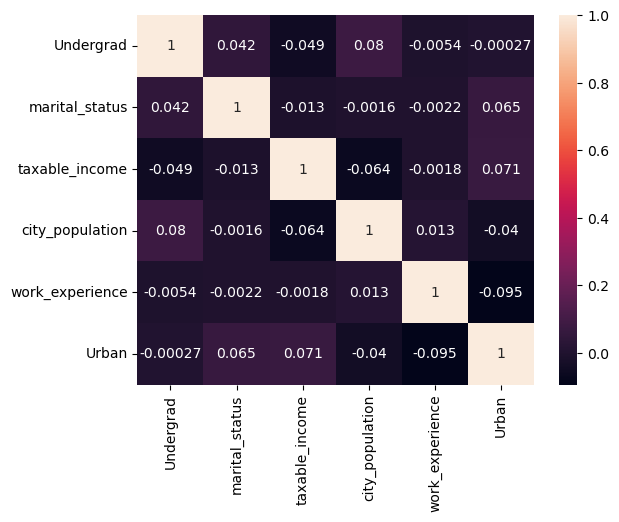

In [7]:
sns.heatmap(fraud.corr(),annot=True)

In [17]:
x = fraud.iloc[:,fraud.columns!="taxable_income"]
y = fraud["taxable_income"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [12]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

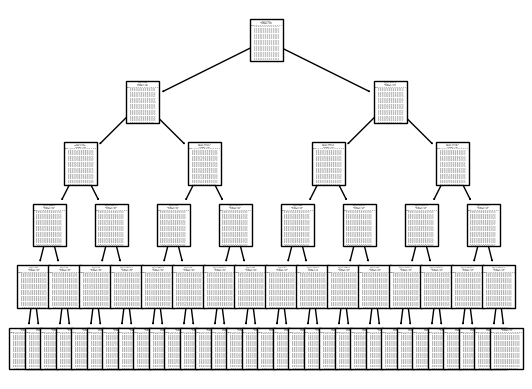

In [13]:
tree.plot_tree(model);

In [13]:
fn=["Undergrad","marital_status","taxable_income","city_population","work_experience","Urban"]
cn=["Good","Risky"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,2),dpi=5000)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [14]:
pred = model.predict(x_test)

In [15]:
confusion_matrix(y_test,pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
accuracy_score(y_test,pred)

0.0